<a href="https://colab.research.google.com/github/FrankTHEAnalystCR/Mi-Primer-Modelo-de-Machine-Learning/blob/main/Mi_Primer_Modelo_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Etapas de un problema de Machine Learning**

* **Definir el problema:** Que se pretende predecir? o Que datos es necesario conseguir?
* **Explorar y entender** los datos para crear el modelo
* **Metrica de exito:** Definir una apropiada de cuantificar como de buenos son los resultados.
* **Preparar la estrategia para evaluar el modelo:** Separar las observaciones (filas) en conjunto de datos de entrenamiento, un conjunto de validacion (validacion cruzada) y un conjunto de test. Es muy importe asegurar que ninguna informacion del conjunto de test participa en el proceso de entrenamiento.
* **Preprocesamiento de Datos:** Aplicar las transformaciones necesarias para que los datos puedan ser interpretados por el algoritmo de machine learning seleccionado.
* **Ajustar un primer modelo capaz de superar unos resultados minimos:** Por ejemplo, en los problemas clasificacion, el minimo es superar el % de la clase mayoritaria (la moda). En los de regresion, la media de la variable respuesta.
* Gradualmente, mejorar el modelo incorporando-creando nuevas variables u optimizando los hiperparametros.
* **Evaluar la capacidad del modelo final** con el conjunto de test para tener una estimacion de la capacidad que tiene el modelo cuando predice nuevas observaciones
* **Entrenar el modelo final** con todos los datos disponibles.

In [ ]:
!pip install numpy==1.26.4 pandas==2.2.2 --force-reinstall

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 26.7 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.2
    Uninstalling tzdata-2025.2:
      Successfully uninstalled tzdata-2025.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1.17.0
  Attempting uninstall: numpy
    

In [ ]:
!pip uninstall -y fitter numpy pandas scipy matplotlib seaborn scikit-learn
!pip install --upgrade numpy pandas scipy matplotlib seaborn scikit-learn
!pip install fitter
import os; os.kill(os.getpid(), 9)  # Reinicia Colab automáticamente

Found existing installation: fitter 1.7.1
Uninstalling fitter-1.7.1:
  Successfully uninstalled fitter-1.7.1
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: scipy 1.14.1
Uninstalling scipy-1.14.1:
  Successfully uninstalled scipy-1.14.1
Found existing installation: matplotlib 3.10.0
Uninstalling matplotlib-3.10.0:
  Successfully uninstalled matplotlib-3.10.0
Found existing installation: seaborn 0.13.2
Uninstalling seaborn-0.13.2:
  Successfully uninstalled seaborn-0.13.2
Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install fitter


In [ ]:
# Tratamiento de Datos
import numpy as np
import pandas as pd

# Visual
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import matplotlib.ticker as ticker

#Preprocesamiento de Datos y Modelado
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#Otras
from fitter import Fitter, get_common_distributions

In [ ]:
# Configurar Matplotlib
plt.rcParams['image.cmap'] = 'bwr'
plt.rcParams['figure.dpi'] = '100'
plt.rcParams['savefig.bbox'] = 'tight'
style.use('ggplot') or plt.style.use('ggplot')

# Configuracion de Errores o Advertencias
import warnings
warnings.filterwarnings('ignore')

In [ ]:
path = '/Dataset_Energia_Electrica.csv'
datos = pd.read_csv(path, encoding='latin-1')

datos.head()

,Area_del_Edificio,Ano_de_Construccion,Tipo_de_Aislamiento,Numero_de_Ventanas,Sistema_Calefaccion,Sistema_Refrigeracion,Uso_del_Edificio,Ubicacion_Geografica,Medidas_Eficiencia_Energetica,Consumo_Energetico_Anual
0,296.966077,1928,Básico,15,Moderado,Avanzado,Industrial,Minnesota,1,478.700084
1,371.835215,2004,Superior,17,Avanzado,Básico,Residencial,Utah,4,297.845980
2,321.243519,1959,Básico,16,Básico,Avanzado,Residencial,Maryland,3,332.399639
3,295.197432,1992,Avanzado,1,Básico,Avanzado,Comercial,Pennsylvania,9,111.162625
4,240.644660,1965,Básico,1,Avanzado,Avanzado,Industrial,Vermont,9,325.902110


# Analisis Exploratorio de los Datos

Antes de entrenar un modelo predictivo, o inclusive antes de realizar cualquier calculo con un nuevo conjunto de datos, es **muy importante** realizar una exploracion descriptiva de los mismos. Este proceso nos permite entender mejor que informacion contiene cada variable, asi como detectar posibles errores. Algunos frecuentes son:

* Que una columna se haya almacenado con el tipo de datos incorrecto: una variable numerica esta siendo reconocida como texto o viceversa.
* Que una variable contenga valores que no tienen sentido: por ejemplo, para que indicar en este caso que una vivienda tiene un valor de 0 o un espacio vacio.
*Que por error en una variable se haya introducido un texto.

In [ ]:
# Tipo de Datos contiene cada columna

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area_del_Edificio              10000 non-null  float64
 1   Ano_de_Construccion            10000 non-null  int64  
 2   Tipo_de_Aislamiento            10000 non-null  object 
 3   Numero_de_Ventanas             10000 non-null  int64  
 4   Sistema_Calefaccion            10000 non-null  object 
 5   Sistema_Refrigeracion          10000 non-null  object 
 6   Uso_del_Edificio               10000 non-null  object 
 7   Ubicacion_Geografica           10000 non-null  object 
 8   Medidas_Eficiencia_Energetica  10000 non-null  int64  
 9   Consumo_Energetico_Anual       10000 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 781.4+ KB


In [ ]:
# Cantida de observaciones

datos.shape

(10000, 10)

In [ ]:
# Estadistica Descriptiva de las variables numericas

datos.select_dtypes(include= ['float', 'int']).describe()

,Area_del_Edificio,Ano_de_Construccion,Numero_de_Ventanas,Medidas_Eficiencia_Energetica,Consumo_Energetico_Anual
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,273.406501,1961.690900,9.49310,5.458700,245.670129
std,130.322513,35.448634,5.73671,2.873207,100.222264
min,50.032602,1900.000000,0.00000,1.000000,-146.965665
25%,160.389523,1931.000000,5.00000,3.000000,176.021396
50%,272.075464,1962.000000,9.00000,5.000000,245.636441
75%,386.731798,1993.000000,14.00000,8.000000,314.955119
max,499.990078,2022.000000,19.00000,10.000000,596.204082


## Correlacion Entre Variables

2025-04-12 02:59:13.789 | WARNING  | fitter.fitter:plot_pdf:419 - gennorm,johnsonsb was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
rdist,0.000001,1599.761554,1621.392575,inf,0.004233,0.993632
beta,0.000001,1601.392329,1630.233691,inf,0.004200,0.994247
tukeylambda,0.000002,1603.906415,1625.537437,inf,0.005193,0.948949
gausshyper,0.000002,1603.379199,1646.641241,inf,0.007281,0.661293
nakagami,0.000002,1574.672816,1596.303838,inf,0.007697,0.591336
powernorm,0.000002,1575.323300,1596.954321,inf,0.007864,0.563728
vonmises_line,0.000002,1573.081730,1594.712751,inf,0.007561,0.614061
erlang,0.000002,1573.868996,1595.500017,inf,0.007443,0.633916
"gennorm,johnsonsb",inf,inf,inf,inf,NaN,NaN


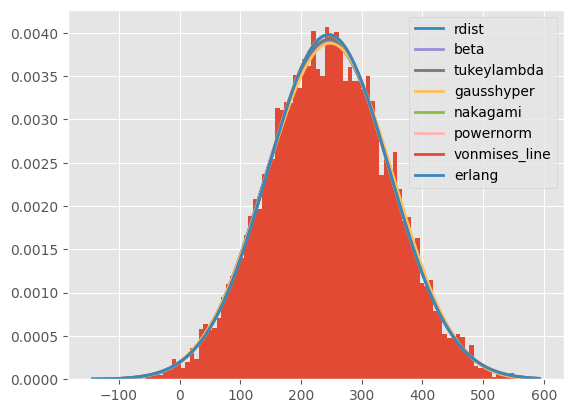

In [ ]:
distiribuciones = ['gennorm,johnsonsb', 'rdist', 'beta', 'tukeylambda', 'gausshyper', 'nakagami', 'powernorm', 'vonmises_line', 'erlang']

# CCrear unaa instancia de Fitter para la columna deseada
fitter = Fitter(datos.Consumo_Energetico_Anual,distributions=distiribuciones )

# Ajustar todas las distribuciones disponibles
fitter.fit()

# Mostrar un resumen de las mejores distribuciones
fitter.summary(Nbest=10, plot=True)

#Correlacion Entre Variables

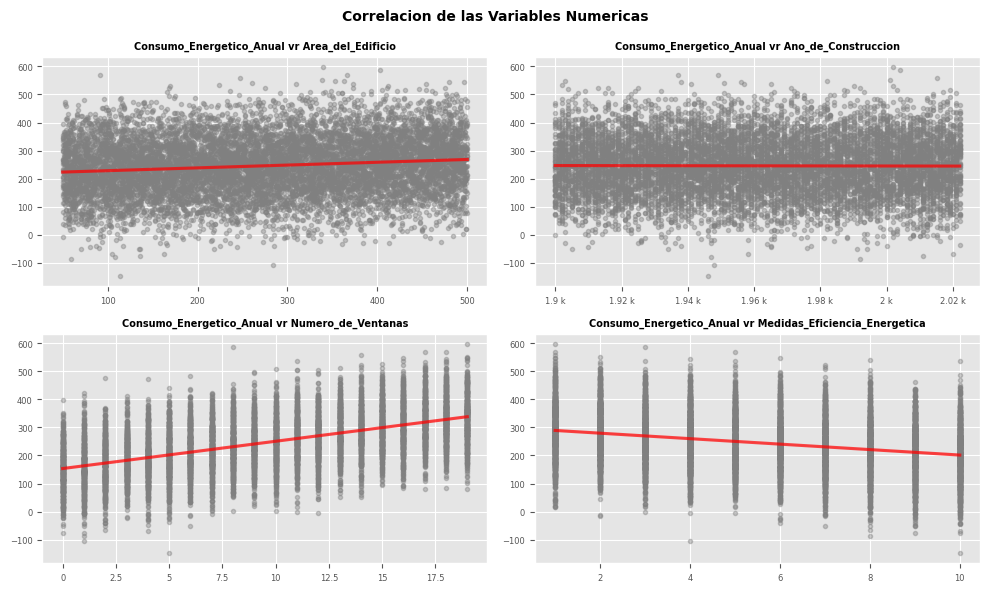

In [ ]:
# Grafico de Correlacion para cada variable numericas

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 6))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include = ['float', 'int']).columns
columnas_numeric = columnas_numeric.drop('Consumo_Energetico_Anual')

for i, column in enumerate(columnas_numeric):
    sns.regplot(
          x = datos[column],
          y = datos['Consumo_Energetico_Anual'],
          color = 'gray',
          marker = '.',
          scatter_kws = {'alpha': 0.4},
          line_kws = {'color':'red','alpha':0.7},
          ax = axes[i]
    )


    axes[i].set_title(f'Consumo_Energetico_Anual vr {column}', fontsize = 7, fontweight = 'bold')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')

for i in [4]:
  fig.tight_layout()
  fig.subplots_adjust(top = 0.9)
  fig.suptitle('Correlacion de las Variables Numericas', fontsize = 10, fontweight = 'bold')

In [ ]:
def matriz_correlacion(corr_mat):
  """Funcion para convertir una matirz de correlacion en formato numerica a tipo tidy o dataframe"""
  corr_mat = corr_mat.stack().reset_index()
  corr_mat.columns = ['variable_1', 'variable_2', 'Correlacion']
  corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
  corr_mat['Valor Absoluto'] = np.abs(corr_mat['Correlacion'])
  corr_mat = corr_mat.sort_values('Valor Absoluto', ascending = False)
  return corr_mat

corr_matriz = datos.select_dtypes(include = ['float', 'int']).corr(method = 'pearson')
matriz_correlacion(corr_matriz).head(10)

,variable_1,variable_2,Correlacion,Valor Absoluto
14,Numero_de_Ventanas,Consumo_Energetico_Anual,0.556287,0.556287
22,Consumo_Energetico_Anual,Numero_de_Ventanas,0.556287,0.556287
23,Consumo_Energetico_Anual,Medidas_Eficiencia_Energetica,-0.279281,0.279281
19,Medidas_Eficiencia_Energetica,Consumo_Energetico_Anual,-0.279281,0.279281
4,Area_del_Edificio,Consumo_Energetico_Anual,0.129797,0.129797
20,Consumo_Energetico_Anual,Area_del_Edificio,0.129797,0.129797
17,Medidas_Eficiencia_Energetica,Numero_de_Ventanas,0.014345,0.014345
13,Numero_de_Ventanas,Medidas_Eficiencia_Energetica,0.014345,0.014345
11,Numero_de_Ventanas,Ano_de_Construccion,0.013200,0.013200
7,Ano_de_Construccion,Numero_de_Ventanas,0.013200,0.013200


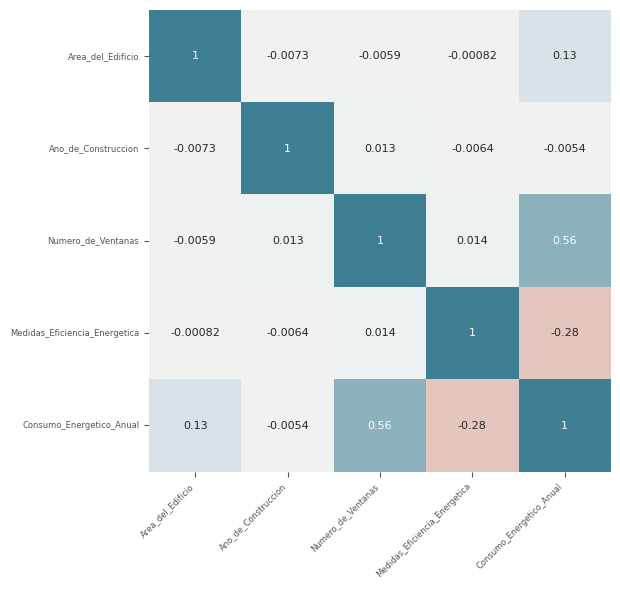

In [ ]:
# Heatmap de matriz de correlaciones

fig,ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6,6))

sns.heatmap(
      corr_matriz,
      annot = True,
      cbar = False,
      annot_kws ={'size': 8},
      vmin = -1,
      vmax = 1,
      center = 0,
      cmap =sns.diverging_palette(20, 220, n = 200),
      square = True,
      ax = ax
)

ax.set_xticklabels(
      ax.get_xticklabels(),
      rotation = 45,
      horizontalalignment = 'right'
)

ax.tick_params(labelsize = 6)
plt.show()



## Revision Valores Nulos

In [ ]:
# Revision de Valores Nulos

datos.isnull().sum()
datos.isna().sum()

,0
Area_del_Edificio,0
Ano_de_Construccion,0
Tipo_de_Aislamiento,0
Numero_de_Ventanas,0
Sistema_Calefaccion,0
Sistema_Refrigeracion,0
Uso_del_Edificio,0
Ubicacion_Geografica,0
Medidas_Eficiencia_Energetica,0
Consumo_Energetico_Anual,0


<Axes: >

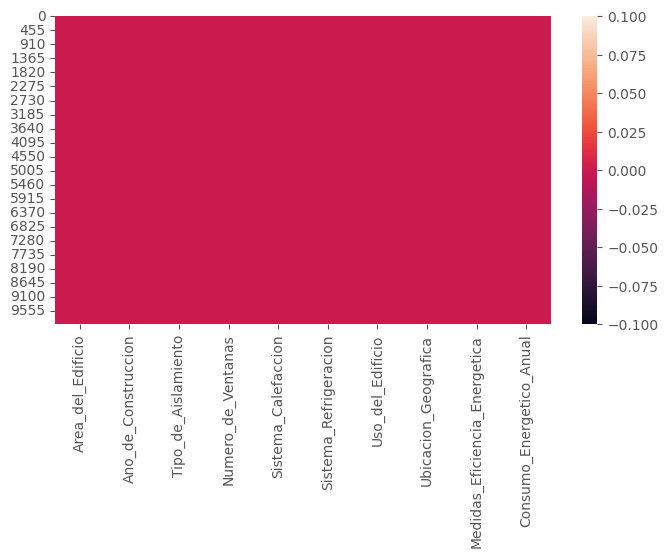

In [ ]:
# Revisar los varoles vacios con mapa de calor

fig, axes = plt.subplots(figsize = (8,4))

sns.heatmap(datos.isnull())

<Axes: >

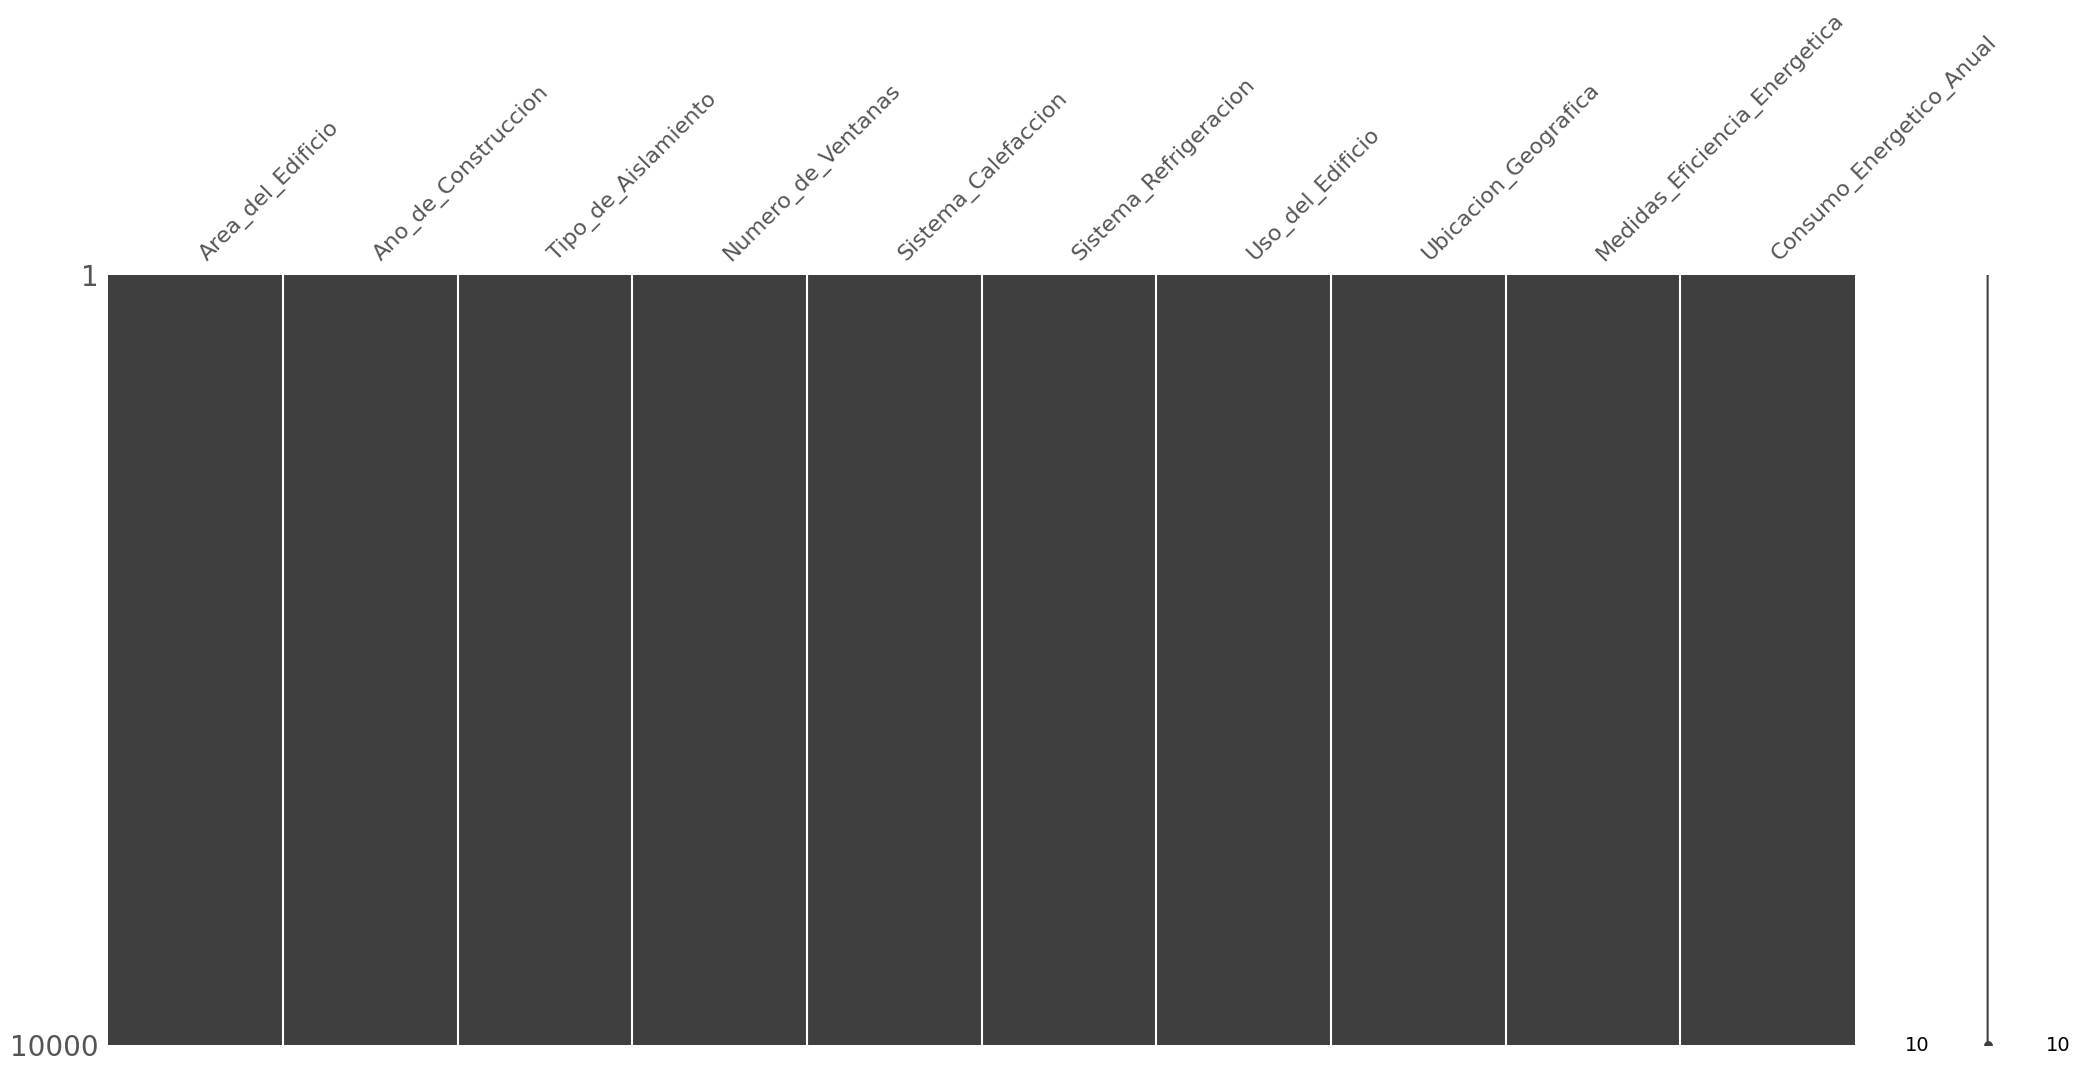

In [ ]:
import missingno as msno

msno.matrix(datos)

# Division Train y Test

Evaluar la capacidad predictiva de un modelo, consiste en comprobar como son las proximas predicciones a los verdaderos valores de la variable respuesta.

Para poder cuantificarlo de forma correcta, se necesita disponer de un conjunto de observaciones, de las que conozca la variable respuesta, pero que el modelo no haya "visto", es decir, que no haya participado en su ajuste. Con esa finalidad se dividen los datos disponibles en un conjunto de entrenamiento y un conjunto de test.

El tamaño adecuado de las particiones depende en gran medida de la cantidad de datos disponibles y la seguridad en la estimacion del error, por lo cual se suele usar 80% y 20% - 70% y 30% que suelen buenos resultado. El reparto debe de hacerse de forma aleatoria o aleatoria estratificada.

In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(
    datos.drop('Consumo_Energetico_Anual', axis = 'columns'),
    datos['Consumo_Energetico_Anual'],
    train_size = 0.8,
    random_state = 1234,
    shuffle = True
)

In [ ]:
print('Resultado de particion de los datos de Entrenamiento',
      '----------------------------------------------------',
      Y_train.describe(),sep='\n')

Resultado de particion de los datos de Entrenamiento
----------------------------------------------------
count    8000.000000
mean      245.746697
std       100.286509
min      -146.965665
25%       175.920172
50%       246.689361
75%       314.435114
max       596.204082
Name: Consumo_Energetico_Anual, dtype: float64


In [ ]:
print('Resultado de particion de los datos de Entrenamiento',
      '----------------------------------------------------',
      y_test.describe(),sep='\n')

Resultado de particion de los datos de Entrenamiento
----------------------------------------------------
count    2000.000000
mean      245.363855
std        99.989315
min       -50.774118
25%       176.884601
50%       242.272416
75%       316.332358
max       537.192005
Name: Consumo_Energetico_Anual, dtype: float64


## Reingenieria de Caracteristicas

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Codificacion One-Hot de las variables categoticas
vars_categoricas = X_train.select_dtypes(include = ['object']).columns
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')

# Aplicar codificacion a conjuntos de entrenamiento y prueba
x_train_codificadas = onehot_encoder.fit_transform(X_train[vars_categoricas])
x_test_codificadas = onehot_encoder.transform(x_test[vars_categoricas])

# Convertir los datos codificados con los datos numericos
datos_x_train_codificados = pd.DataFrame(x_train_codificadas, columns=onehot_encoder.get_feature_names_out(vars_categoricas))
datos_x_test_codificados = pd.DataFrame(x_test_codificadas, columns=onehot_encoder.get_feature_names_out(vars_categoricas))

# Unir los datos condificados con los datos numericos
x_train_depurados = pd.concat([X_train.drop(vars_categoricas, axis=1).reset_index(drop=True), datos_x_train_codificados], axis=1)
x_test_depurados = pd.concat([x_test.drop(vars_categoricas, axis=1).reset_index(drop=True), datos_x_test_codificados], axis=1)




In [ ]:
x_train_depurados

,Area_del_Edificio,Ano_de_Construccion,Numero_de_Ventanas,Medidas_Eficiencia_Energetica,Tipo_de_Aislamiento_Básico,Tipo_de_Aislamiento_Moderado,Tipo_de_Aislamiento_Superior,Sistema_Calefaccion_Básico,Sistema_Calefaccion_Moderado,Sistema_Refrigeracion_Básico,...,Uso_del_Edificio_Residencial,Ubicacion_Geografica_Iowa,Ubicacion_Geografica_Maine,Ubicacion_Geografica_Maryland,Ubicacion_Geografica_Michigan,Ubicacion_Geografica_Minnesota,Ubicacion_Geografica_Oklahoma,Ubicacion_Geografica_Pennsylvania,Ubicacion_Geografica_Utah,Ubicacion_Geografica_Vermont
0,448.801123,2008,19,1,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,268.772944,1931,15,4,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,108.279219,1993,2,3,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,245.044198,1995,2,6,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,204.054069,1930,5,1,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,231.706733,1909,2,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7996,182.999850,1940,19,4,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7997,270.693795,1905,13,4,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7998,398.636426,1913,5,6,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Seleccion de Caracteristicas Importantes

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Entrnamiento del modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train_depurados, Y_train)

# Obtener la importancia de las caracteristicas
feature_importances = rf_model.feature_importances_

# Crear un dataframe con las caracteristicas y su importancia
feature_df = pd.DataFrame({
    'Feature': x_train_depurados.columns,
    'Importance': feature_importances
  }).sort_values(by='Importance', ascending=False)

# Mostrar las 10 caracteristicas mas importantes
top_features = feature_df.head(10)

top_features

,Feature,Importance
2,Numero_de_Ventanas,0.338607
12,Uso_del_Edificio_Residencial,0.107364
3,Medidas_Eficiencia_Energetica,0.107113
0,Area_del_Edificio,0.089441
1,Ano_de_Construccion,0.066027
11,Uso_del_Edificio_Industrial,0.059515
7,Sistema_Calefaccion_Básico,0.048964
9,Sistema_Refrigeracion_Básico,0.042611
6,Tipo_de_Aislamiento_Superior,0.025257
4,Tipo_de_Aislamiento_Básico,0.024228


## Creacion y Entrenamiento del Modelo

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Seleccion de caracteristicas
selected_features = top_features['Feature'].values

# Asegurandonos de seleccionar estas caracteristicas tanto en los conjuntos de entrenamiento como de prueba
x_train_seleccionado = x_train_depurados[selected_features]
x_test_seleccionado = x_test_depurados[selected_features]

# Construyendo y entrenando el modelo de regresion lineal
linear_reg = LinearRegression()
linear_reg.fit(x_train_seleccionado, Y_train)

# Realizando predicciones en el conjunto de prueba
y_pred = linear_reg.predict(x_test_seleccionado)

## Evaluacion del Modelo

In [ ]:
# Predecir el conjunto de datos de Prueba
y_pred = linear_reg.predict(x_test_seleccionado)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

(mse, r2)

(2954.1518015609913, 0.7043738639467807)

## Probando el Modelo de ML con Datos Nuevos

In [ ]:
import pandas as pd

# Creando una nueva fila de datos ficticios
# Asumimos que conocemos las columnas y el tipo de datos basandonos en el conjuntos de datos original
new_data_dict = {
  'Area_del_Edificio': 350.0, #Suponemos una area de 350.0
  'Ano_de_Construccion': 2023, #Ano de construccion 2023
  'Tipo_de_Aislamiento': 'Avanzado', #Tipo de aislamineto avanzado
  'Numero_de_Ventanas': 10, #Numero de ventanas 10
  'Sistema_Calefaccion': 'Moderado', #Sistema de calefaccion Moderado
  'Sistema_Refrigeracion': 'Avanzado', #sistema de refrigeracion avanzado
  'Uso_del_Edificio': 'Residencial', # Uso del edificio residencial
  'Ubicacion_Geografica': 'Utah', # Ubicacion geografica en California
  'Medidas_Eficiencia_Energetica': 5 # Medidas de eficiencia energetica 5
}

datos_nuevos = pd.DataFrame([new_data_dict])

datos_nuevos


,Area_del_Edificio,Ano_de_Construccion,Tipo_de_Aislamiento,Numero_de_Ventanas,Sistema_Calefaccion,Sistema_Refrigeracion,Uso_del_Edificio,Ubicacion_Geografica,Medidas_Eficiencia_Energetica
0,350.0,2023,Avanzado,10,Moderado,Avanzado,Residencial,Utah,5


In [ ]:
# Aplicar One-Hot Encoding a las variables categoricas
datos_nuevos_codifcados = onehot_encoder.transform(datos_nuevos[vars_categoricas])

# Convertir a DataFrame y seleccionar las caracteristicas relevantes
datos_nuevos_codificados_df = pd.DataFrame(datos_nuevos_codifcados, columns=onehot_encoder.get_feature_names_out(vars_categoricas))
datos_nuevos_depurados = pd.concat([datos_nuevos.drop(vars_categoricas, axis=1).reset_index(drop=True), datos_nuevos_codificados_df], axis=1)
datos_nuevos_seleccionados = datos_nuevos_depurados[selected_features]

# Hacer la prediccion
predicted_value = linear_reg.predict(datos_nuevos_seleccionados)

predicted_value

array([242.04403411])

In [ ]:
# Agrega el valor de la prediccion a new data
datos_nuevos['Prediccion_Consumo_Energetico'] = predicted_value

datos_nuevos

,Area_del_Edificio,Ano_de_Construccion,Tipo_de_Aislamiento,Numero_de_Ventanas,Sistema_Calefaccion,Sistema_Refrigeracion,Uso_del_Edificio,Ubicacion_Geografica,Medidas_Eficiencia_Energetica,Prediccion_Consumo_Energetico
0,350.0,2023,Avanzado,10,Moderado,Avanzado,Residencial,Utah,5,242.044034
